In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자크기
plt.rcParams['font.size'] = 14
# 적용한 폰트에 - 기호가 없다면 깨진다. - 기호는 설정한 폰트의
# 영향을 받지 않도록 설정한다.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('data/65세이상_인구대비_성별·지역별_수급자_현황.csv')
print(df)

      구분   인구 (명) 인구 (명).1 인구 (명).2 연금수급자(B) (명) 연금수급자(B) (명).1  \
0     시점        계       남자       여자            계             남자   
1   2013  6250986  2597151  3653835      2067085        1255469   
2   2014  6520607  2726895  3793712      2273816        1376395   
3   2015  6775101  2850403  3924698      2473690        1491335   
4   2016  6995652  2956784  4038868      2664358        1595471   
5   2017  7356106  3130925  4225181      2936683        1746652   
6   2018  7650408  3272648  4377760      3180045        1872665   
7   2019  8026915  3457689  4569226      3478558        2027985   
8   2020  8496077  3680518  4815559      3842189        2212516   
9   2021  8851033  3860508  4990525      4215028        2395819   
10  2022  8851033  3860508  4990525      4648286        2604462   
11  2023  9730411  4296967  5433444      5079883        2802191   

   연금수급자(B) (명).2 비율(B)/(A) (%) 비율(B)/(A) (%).1 비율(B)/(A) (%).2  
0              여자             계              남자              여

In [3]:
df.columns

Index(['구분', '인구 (명)', '인구 (명).1', '인구 (명).2', '연금수급자(B) (명)',
       '연금수급자(B) (명).1', '연금수급자(B) (명).2', '비율(B)/(A) (%)', '비율(B)/(A) (%).1',
       '비율(B)/(A) (%).2'],
      dtype='object')

In [4]:
# 파일 경로 지정
file_path = 'data/65세이상_인구대비_성별·지역별_수급자_현황.csv'

# CSV 파일 로드 (header=[0,1]으로 다중 컬럼 처리)
df1 = pd.read_csv(file_path, encoding='utf-8', header=[0,1])

# 다중 컬럼을 단일 컬럼으로 합치기 (ex: '연금수급자(B) (명)_계')
df1.columns = ['_'.join([str(i) for i in col if i != '']).strip() for col in df1.columns]

# 결과 출력 (데이터프레임의 첫 5행)
print(df1.head())

   구분_시점  인구 (명)_계  인구 (명)_남자  인구 (명)_여자  연금수급자(B) (명)_계  연금수급자(B) (명)_남자  \
0   2013   6250986    2597151    3653835         2067085          1255469   
1   2014   6520607    2726895    3793712         2273816          1376395   
2   2015   6775101    2850403    3924698         2473690          1491335   
3   2016   6995652    2956784    4038868         2664358          1595471   
4   2017   7356106    3130925    4225181         2936683          1746652   

   연금수급자(B) (명)_여자  비율(B)/(A) (%)_계  비율(B)/(A) (%)_남자  비율(B)/(A) (%)_여자  
0           811616            33.07             20.08             12.98  
1           897421            34.87             21.11             13.76  
2           982355            36.51             22.01             14.50  
3          1068887            38.09             22.81             15.28  
4          1190031            39.92             23.74             16.18  


In [5]:
# 현재 컬럼명 확인
print("현재 컬럼명 리스트:")
print(df1.columns.tolist())

현재 컬럼명 리스트:
['구분_시점', '인구 (명)_계', '인구 (명)_남자', '인구 (명)_여자', '연금수급자(B) (명)_계', '연금수급자(B) (명)_남자', '연금수급자(B) (명)_여자', '비율(B)/(A) (%)_계', '비율(B)/(A) (%)_남자', '비율(B)/(A) (%)_여자']


In [6]:
# 컬럼명 변경: 원하는 이름으로 딕셔너리 생성
new_column_names = {
    # "기존 컬럼명": "새로운 컬럼명"
    '구분_시점': '연도',  # 예시: '구분_시점'을 '연도'로 변경
    '인구 (명)_계': '총인구',
    '인구 (명)_남자': '남자인구',
    '인구 (명)_여자': '여자인구',
    '연금수급자(B) (명)_계': '연금수급자수',
    '연금수급자(B) (명)_남자': '남자연금수급자',
    '연금수급자(B) (명)_여자': '여자연금수급자',
    '비율(B)/(A) (%)_계': '연금수급률',
    '비율(B)/(A) (%)_남자': '남자연금수급률',
    '비율(B)/(A) (%)_여자': '여자연금수급률'
}

# 컬럼명 변경 적용
df1.rename(columns=new_column_names, inplace=True)

# 결과 확인
print("변경된 컬럼명 리스트:")
print(df1.columns.tolist())

변경된 컬럼명 리스트:
['연도', '총인구', '남자인구', '여자인구', '연금수급자수', '남자연금수급자', '여자연금수급자', '연금수급률', '남자연금수급률', '여자연금수급률']


In [7]:
df1

,연도,총인구,남자인구,여자인구,연금수급자수,남자연금수급자,여자연금수급자,연금수급률,남자연금수급률,여자연금수급률
0,2013,6250986,2597151,3653835,2067085,1255469,811616,33.07,20.08,12.98
1,2014,6520607,2726895,3793712,2273816,1376395,897421,34.87,21.11,13.76
2,2015,6775101,2850403,3924698,2473690,1491335,982355,36.51,22.01,14.50
3,2016,6995652,2956784,4038868,2664358,1595471,1068887,38.09,22.81,15.28
4,2017,7356106,3130925,4225181,2936683,1746652,1190031,39.92,23.74,16.18
5,2018,7650408,3272648,4377760,3180045,1872665,1307380,41.57,57.22,29.86
6,2019,8026915,3457689,4569226,3478558,2027985,1450573,43.34,58.65,31.75
7,2020,8496077,3680518,4815559,3842189,2212516,1629673,45.22,60.11,33.84
8,2021,8851033,3860508,4990525,4215028,2395819,1819209,47.62,62.06,36.45
9,2022,8851033,3860508,4990525,4648286,2604462,2043824,52.52,67.46,40.95


In [8]:
# 파일 저장 경로 (예: '/mnt/data/전처리된_연금데이터.csv')
output_file_path = 'data/국민연금 수급률_전처리.csv'

# 전처리된 데이터프레임(df_multi_header)을 CSV로 저장
df1.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"전처리된 데이터가 {output_file_path}에 저장되었습니다!")

전처리된 데이터가 data/국민연금 수급률_전처리.csv에 저장되었습니다!


In [10]:
file_path = 'data/국민연금 수급률_전처리.csv'
df = pd.read_csv(file_path, encoding='utf-8')

df

,연도,총인구,남자인구,여자인구,연금수급자수,남자연금수급자,여자연금수급자,연금수급률,남자연금수급률,여자연금수급률
0,2013,6250986,2597151,3653835,2067085,1255469,811616,33.07,20.08,12.98
1,2014,6520607,2726895,3793712,2273816,1376395,897421,34.87,21.11,13.76
2,2015,6775101,2850403,3924698,2473690,1491335,982355,36.51,22.01,14.50
3,2016,6995652,2956784,4038868,2664358,1595471,1068887,38.09,22.81,15.28
4,2017,7356106,3130925,4225181,2936683,1746652,1190031,39.92,23.74,16.18
5,2018,7650408,3272648,4377760,3180045,1872665,1307380,41.57,57.22,29.86
6,2019,8026915,3457689,4569226,3478558,2027985,1450573,43.34,58.65,31.75
7,2020,8496077,3680518,4815559,3842189,2212516,1629673,45.22,60.11,33.84
8,2021,8851033,3860508,4990525,4215028,2395819,1819209,47.62,62.06,36.45
9,2022,8851033,3860508,4990525,4648286,2604462,2043824,52.52,67.46,40.95


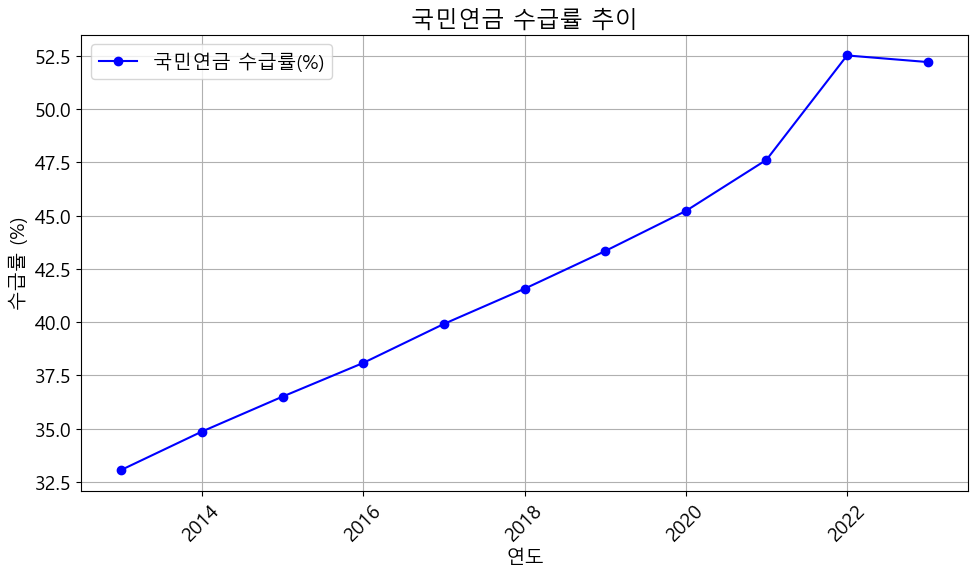

In [12]:
# 연도별 수급률 시각화
plt.figure(figsize=(10,6))
plt.plot(df['연도'], df['연금수급률'], marker='o', linestyle='-', color='b', label='국민연금 수급률(%)')
plt.xlabel('연도')
plt.ylabel('수급률 (%)')
plt.title('국민연금 수급률 추이')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()